## 1. Базовая задача МНК.


**Теоретический вопрос 1.**

Пусть дана выборка точек $y_i$. Решите аналитически задачу МНК, моделируя данные постоянной величиной $\check{y}$, что отвечает минимизации функции потерь
$$
\mathcal{L}=\sum_{i=1}^l\left(y_i-\check{y}\right)^2 \rightarrow \min _{\breve{y}} .
$$

**Теоретический вопрос 2.**

Покажите, что прямая, построенная по методу МНК, всегда проходит через точку $(\bar{x}, \bar{y})$, где $\bar{x}$ и $\bar{y}$ - выборочные средние. Обобщите на случай многомерной регрессии.

**Практическое задание.**

Для четырех выборок из квартета Энскомба вычислите выборочные дисперсии $x$ и $y$ координат, а также коэффициент линейной корреляции Пирсона. Изобразите выборки на графиках. Данные можно получить в системе јuруter с помощью библиотеки seaborn, вызвав метод `load_dataset('anscombe')` .

1.	Запишем функцию потерь:


$\mathcal{L} = \sum_{i=1}^{l} (y_i - \hat{y})^2.$


	2.	Найдем производную функции потерь 


$\frac{d\mathcal{L}}{d\hat{y}} = \frac{d}{d\hat{y}} \left( \sum_{i=1}^{l} (y_i - \hat{y})^2 \right) = \sum_{i=1}^{l} 2(y_i - \hat{y})(-1) = -2 \sum_{i=1}^{l} (y_i - \hat{y}).$


	3.	Приравняем производную к нулю для нахождения минимума:


$-2 \sum_{i=1}^{l} (y_i - \hat{y}) = 0.$


	4.	Решаем уравнение:


$\sum_{i=1}^{l} (y_i - \hat{y}) = 0,$


что дает:


$\hat{y} = \frac{1}{l} \sum_{i=1}^{l} y_i.$


1.	Запишем функцию потерь:


$\mathcal{L} = \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_i))^2.$


	2. Производная функции потерь:


$\frac{\partial \mathcal{L}}{\partial \beta_0} = -2 \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_i) = 0,$





	4.	Из уравнения :


$\sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_i) = 0,$

что можно переписать как:


$\sum_{i=1}^{n} y_i = n \beta_0 + \beta_1 \sum_{i=1}^{n} x_i.$


Поделим обе части на  n :


$\bar{y} = \beta_0 + \beta_1 \bar{x}.$


## 2. Централизация признаков и МНК.

Покажите, что следующие две процедуры приводят к одинаковому результату:
1. В матрице объект-признак $X$ из каждого столбца вычитается среднее по столбцу (централизация признаков). После этого вычисляется $\left(X^T X\right)^{-1}$.
2. К матрице $X$ дописывается в конец столбец, состоящий из одних единиц. Вычисляется $\left(X^T X\right)^{-1}$ и в получившейся матрице вычеркивается последний столбец и последняя строка.


Также проверьте это практически для случайно сгенерированных матриц.

1.	Централизация матрицы  X :

$X_{\text{centered}} = X - \mathbf{1}_n \mu^\top$

	2.	Вычисление  

$(X_{\text{centered}}^\top X_{\text{centered}})^{-1} = (X^\top X - n \mu \mu^\top)^{-1}$


1.	Добавление столбца единиц к  X :



$X_1 = [X \ \mathbf{1}_n]$


Вычисление  $(X_1^\top X_1)^{-1}$  и удаление последнего столбца и строки:

Матрица  $X_1^\top X_1 $ имеет вид:

\begin{bmatrix}
X^\top X & X^\top \mathbf{1}_n \\
\mathbf{1}_n^\top X & n \\
\end{bmatrix}

\begin{bmatrix}
X^\top X & n \mu \\
n \mu^\top & n \\
\end{bmatrix}


Использование формулы Шермана-Моррисона:
Для матрицы  $S = X^\top X $ и рангового обновления  $-n \mu \mu^\top $:

$(S - n \mu \mu^\top)^{-1} = S^{-1} + \frac{S^{-1} n \mu \mu^\top S^{-1}}{1 - n \mu^\top S^{-1} \mu}$


Если умножить эту матрицу на  
\begin{bmatrix}
X^\top X & n \mu \\
n \mu^\top & n \\
\end{bmatrix}

То левый верхний угол будет единичным

In [3]:
import numpy as np

In [4]:


n = 100  
p = 5    

X = np.random.randn(n, p)

# Процедура 1
X_centered = X - np.mean(X, axis=0)
Inv1 = np.linalg.inv(X_centered.T @ X_centered)

# Процедура 2
X1 = np.hstack((X, np.ones((n, 1))))
G_inv = np.linalg.inv(X1.T @ X1)
Inv2 = G_inv[:-1, :-1]  # Удаляем последний столбец и строку


print(np.linalg.norm(Inv1 - Inv2))

4.436051852095784e-18


## 3. Геометрический смысл псевдообратной матрицы.

На лекции обсуждалось, что метод наименьших квадратов - это способ поставить задачу о решении переопределенной системы $X w=y$, которая имеет явный ответ, выражающийся через левую псевдообратную матрицу для $X$. Для недоопределенной системы $X w=y$ (имеющей бесконечно много решений) можно поставить задачу о поиске решения с минимальной $l_2$-нормой весов $\|w\|^2=w^T w$. Решите такую задачу и покажите, что ответ выражается через правую псевдообратную матрицу для $X$. Считайте, что прямоугольная матрица $X$ имеет полный ранг (максимально возможный).

1.	Запишем функцию Лагранжа:

$L(w, \lambda) = \frac{1}{2} w^T w - \lambda^T (X w - y)$

где  $\lambda$  — вектор множителей Лагранжа размерности  n .
Найдём градиент по  w  и приравняем его нулю:

$\nabla_w L = w - X^T \lambda = 0 \quad \Rightarrow \quad w = X^T \lambda$

Подставим выражение для $ w $ в ограничение $ X w = y $:

$X w = X X^T \lambda = y$

Решим полученное уравнение относительно  \lambda :

$\lambda = (X X^T)^{-1} y$

Заметим, что  X X^T  обратима, поскольку  X  имеет полный ранг.
Найдём искомый вектор  w :

$w = X^T \lambda = X^T (X X^T)^{-1} y$


## 4. Матрица объект-признак.

**Теоретический вопрос 1.**

Пусть $X$ - матрица объект-признак (размерность $l \times F$ ), для которой сингулярное разложение имеет вид $X=$ $V \sqrt{\Lambda} U^T$. После понижения размерности данных с помощью метода главных компонент, в диагональной матрице $\Lambda=\operatorname{diag}\left\{\lambda_1 \geq \cdots \geq \lambda_F\right\}$ оставляются только $\tilde{F}$ наибольших сингулярных чисел: $\tilde{\Lambda}=\operatorname{diag}\left\{\lambda_1 \geq \cdots \geq \lambda_{\tilde{F}}\right\}$. При этом данные, как правило, можно восстановить только с некоторой ошибкой: $\tilde{X}=V \sqrt{\tilde{\Lambda}} U^T \neq X$. Покажите, что $L_2$ норма ошибки выражается через сумму по оставшимся сингулярным числам:
$$
\frac{1}{l}\|X-\tilde{X}\|^2=\sum_{i=\tilde{F}+1}^F \lambda_i
$$

**Теоретический вопрос 2.**

Покажите, что сингулярный вектор матрицы $X$, отвечающий наибольшему сингулярному числу, является решением задачи

$$
\boldsymbol{u}=\operatorname{argmax}_{|| \boldsymbol{u} \|=1}(X \boldsymbol{u})^2,
$$

где подразумевается матричное умножение $X$ на $\boldsymbol{u}$.


**Практическое задание.**

Сгенерируйте случайную симметричную матрицу $A$ размера $3 \times 3$. Сгенерируйте $N$ элементов из нормального распределения $P \propto e^{-\boldsymbol{x}^T} A \boldsymbol{x}$ (получится матрица объект-признак $X$ размерности $N \times 3$ ). Визуализируйте полученное облако точек (для построения интерактивных трехмерных графиков можно воспользоваться пакетом ipyml в системе jupyter). Примените к матрице $X$ метод главных компонент, визуализируйте сингулярные вектора вместе с облаком точек, а также двумерные проекции элементов выборки на плоскости, задаваемые сингулярными векторами.

1. 




$E = X - \tilde{X} = V (\sqrt{\Lambda} - \sqrt{\tilde{\Lambda}}) U^T$

$D = (\sqrt{\Lambda} - \sqrt{\tilde{\Lambda}})$

 L_2 -норма ошибки (квадрат Фробениусовой нормы):

$|E\|_F^2 = \operatorname{Tr}(E^T E)$


Подставим выражение для  E :

$|E\|_F^2 = \operatorname{Tr}\left( (U D V^T)^T (U D V^T) \right) = \operatorname{Tr}(V D^2 V^T) = \operatorname{Tr}(D^2 V^T V) = \operatorname{Tr}(D^2)$





$\|E\|F^2 = \sum_{i=\tilde{F}+1}^{F} \sigma_i^2 = \sum_{i=\tilde{F}+1}^{F} \lambda_i$

ЧТД



2. 



$X = U \Sigma V^T,$



$\| X \mathbf{u} \|^2 = \mathbf{u}^T X^T X \mathbf{u}.$



$X^T X = V \Sigma^T U^T U \Sigma V^T = V \Sigma^T \Sigma V^T = V \Sigma^2 V^T.$

Замена переменных:
Обозначим  $\mathbf{z} = V^T \mathbf{u} $. Так как  V  — ортогональная матрица, то  $\|\mathbf{z}\| = \|\mathbf{u}\| = 1$ .
Тогда:

$\| X \mathbf{u} \|^2 = \mathbf{u}^T V \Sigma^2 V^T \mathbf{u} = \mathbf{z}^T \Sigma^2 \mathbf{z}.$


Задача сводится к максимизации:

$\mathbf{z}^T \Sigma^2 \mathbf{z} = \sum_{i=1}^{n} \sigma_i^2 z_i^2,$

при условии  $\sum_{i=1}^{n} z_i^2 = 1 .$

  $z_1 = 1  и  z_i = 0  для  i > 1 .$
	


$\mathbf{u} = V \mathbf{z} = V \begin{bmatrix}1 \\ 0 \\ \vdots \\ 0\end{bmatrix} = \mathbf{v}_1,$

ЧТД

[[4.06980872 2.89914555]
 [2.89914555 5.18172812]]
(500, 2)


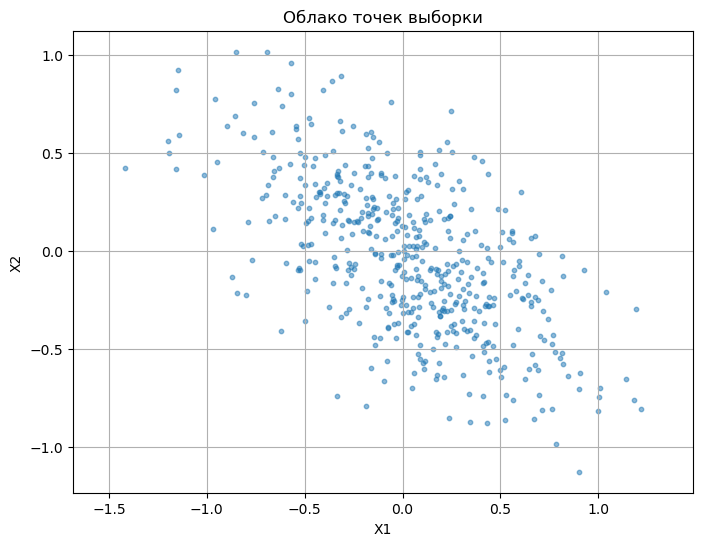

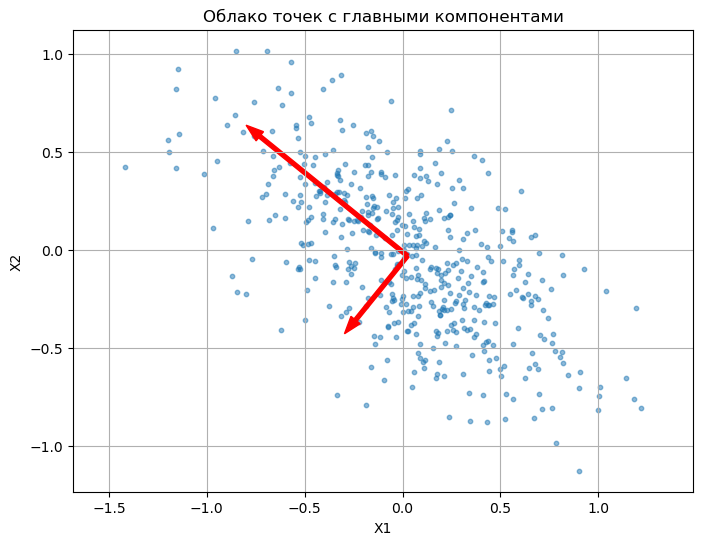

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

np.random.seed(0)
R = np.random.randn(2, 2)
A = np.dot(R.T, R)
print(A)

A_inv = np.linalg.inv(A)
C = 0.5 * A_inv
N = 500
X = np.random.multivariate_normal(mean=np.zeros(2), cov=C, size=N)
print(X.shape)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Облако точек выборки')
plt.axis('equal')
plt.grid(True)
plt.show()

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

mean_X = np.mean(X, axis=0)
components = pca.components_
explained_variances = pca.explained_variance_
scaled_components = components * np.sqrt(explained_variances).reshape(-1, 1) * 2  # Масштабируем для наглядности

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.5)

for i in range(2):
    vector = scaled_components[i]
    plt.arrow(mean_X[0], mean_X[1], vector[0], vector[1],
              width=0.02, color='r', length_includes_head=True)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Облако точек с главными компонентами')
plt.axis('equal')
plt.grid(True)
plt.show()



## 5. Геометрический смысл сингулярного разложения.

**Теоретический вопрос 1.**

Пусть дан набор точек на плоскости $\left(x_i, y_i\right)$, для которых выборочные средние $x_i$ и $y_i$ равны нулю. Покажите, что сингулярный вектор для матрицы объект-признак, отвечающий наибольшему сингулярному числу, задает прямую $a$ (проходящую через начало координат), которая является решением следующей задачи оптимизации:
$$
L^{\prime}=\sum_{i=1}^N \operatorname{distance}^2\left[\left(x_i, y_i\right) ; a\right] \quad \longrightarrow \quad \min _a,
$$
где distance $\left[\left(x_i, y_i\right) ; a\right]$ - расстояние от точки $\left(x_i, y_i\right)$ до прямой $a$ (равное длине перпендикуляра).
Обратите внимание, что такая задача отличается от задачи МНК, в которой расстояние от точки до аппроксимирующей прямой вычисляется не по перпендикуляру, а вдоль оси $y$, отвечающей целевой переменной.

**Теоретический вопрос 2.**

Пусть дан набор из $N$ точек в трехмерном пространстве $X_{i \alpha}, i \in\{1, \ldots, N\}, \alpha \in\{1,2,3\}$. Покажите, что задача нахождения сингулярных чисел матрицы $X$ эквивалентна нахождению главных моментов инерции твердого тела, составленного из набора точечных масс, расположенных в точках $\left(X_{i 1}, X_{i 2}, X_{i 3}\right)$ (можно представлять себе, что точечные массы соединены между собой невесомыми и абсолютно жесткими стержнями).

**Практическое задание.**

Пусть в SVD-разложении можно пренебречь следующими малыми сингулярными значениями: $\varepsilon>\sigma_{r+1} \geq \sigma_{r+2} \geq \cdots \geq \sigma_n$. $\left(\varepsilon=10^{-8}\right)$. Тогда $x_{T S V D}=\sum_{i=1}^r \sigma_i^{-1} v_i\left(u_i^T b\right)(*)$. Параметр $\varepsilon$ определяет версию усеченного SVD (TSVD). Решение TSVD (* ) широко используется в качестве упорядоченного решения задачи. Однако решение (*) не является достаточно точным. Это может быть указано следующим образом.

Пусть матрицы левого и правого сингулярных векторов TSVD обозначены как $U_{T S V D}=\left[u_1, \ldots, u_r\right]$ и $V_{T S V D}=\left[v_1, \ldots, v_r\right]$, а их ортогональное дополнение $\widetilde{U_{a d d}}=\left[\widetilde{u_{r+1}}, \ldots, \widetilde{u_n}\right]$ и $\widetilde{V_{a d d}}=$ $\left[\widetilde{v_{r+1}}, \ldots, \widetilde{v_n}\right]$. Тогда решение системы будет выглядеть следующим образом:

$$
x=x_{T S V D}+\widetilde{V_{a d d}} Z_2
$$
Вектор $z_2$ находится: $\mathrm{C}_2=b_2$, где $C={\widetilde{U_{a d d}}}^T A \widetilde{V_{a d d}}, \quad b_2=$ ${\widetilde{U_{a d d}}}^T b$.

Рассмотрим в качестве примера СЛАУ с матрицей Гильберта, компоненты которой задаются формулой $H_{i, j}=\frac{1}{i+j-1}, i, j=\overline{1, n}$. Она относится к числу плохо обусловленных матриц. Характерная особенность этой матрицы в том, что при возрастании еe порядка минимальные собственные числа (сингулярные числа) очень быстро стремятся к нулю.

Решите систему обычным стандартным методом (из библиотеки numpy) и этим методом. Оцените невязку.

 $H_n x_n=b_n$, где $b_n=\{1,0,0,0,0,0,0,0\}$ для $\mathrm{n}=8$, $b_n=\{1,0,0,0,0,0,0,0,0,0\}$ для $\mathrm{n}=10$.

Число обусловленности для матрицы $\mathrm{H}_8$ равно $3.387 \cdot 10^{10}$, а для $\mathrm{H}_{10}$ равно $3.535 \cdot 10^{13}$.



#1



$L{\prime} = \sum_{i=1}^{N} \text{distance}^2\left[(x_i, y_i); a\right] \to \min_a$

Расстояние от точки  (x_i, y_i)  до прямой  a  (проходящей через начало координат с направляющим вектором  $\mathbf{v} ) $равно $ \| \mathbf{x}_i - (\mathbf{v}^T \mathbf{x}_i) \mathbf{v} \| .$
Сумма квадратов расстояний выражается как:

$L{\prime} = \sum_{i=1}^{N} \left( \| \mathbf{x}_i \|^2 - (\mathbf{v}^T \mathbf{x}_i)^2 \right)$

Минимизация  $L{\prime} $ эквивалентна максимизации $ \sum_{i=1}^{N} (\mathbf{v}^T \mathbf{x}_i)^2 .$
Это сводится к задаче:

$\max_{\|\mathbf{v}\| = 1} \mathbf{v}^T S \mathbf{v}$

 $S = \frac{1}{N} X^T X  $


А то, что v - вектор, отвечающий максимальному сингулярному значению X было доказано ранее

#2 

Пусть  X  — матрица размерности  $N \times 3$ , строки которой содержат координаты точек  $\mathbf{r}_i $. Тогда матрица произведения $ X^T X $ имеет размерность $ 3 \times 3$  и элементы:


$(X^T X){\alpha \beta} = \sum_{i=1}^{N} X_{i\alpha} X_{i\beta} = \sum_{i=1}^{N} x_{i\alpha} x_{i\beta}.$


Тензор инерции можно записать как:


$\mathbf{I} = m \left( \operatorname{Tr}(X^T X) \mathbf{I}_{3} - X^T X \right).$





Собственные значения тензора инерции  $\mathbf{I}$  — это главные моменты инерции. Они определяются как решения характеристического уравнения:


$\det(\mathbf{I} - \lambda \mathbf{I}_{3}) = 0.$


Подставим выражение для  $\mathbf{I}$ :


$\det\left(  \left( \operatorname{Tr}(X^T X) \mathbf{I}{3} - X^T X \right) - \lambda \mathbf{I}{3} \right) = 0.$


Это эквивалентно:


$\det\left( -  X^T X - \lambda \mathbf{I}{3} +  \operatorname{Tr}(X^T X) \mathbf{I}{3} \right) = 0.$


Пусть$ \( \mu =  \operatorname{Tr}(X^T X) - \lambda \)$. Тогда характеристическое уравнение становится:


$\det\left( \mu \mathbf{I}_{3} -  X^T X \right) = 0.$

